# 시계열 데이터

- 시간의 흐름에 따른 데이타_ 아리마?
- 시퀀스 등등

- 시간 순서로 수직하거나, 순차적인 데이터 로 예측

- 완벽한 예측은 불가능
- 다변량 multivariate Data
- 구성의 변경이 어렵다 (유연하지 않음)
- 데이터가 정상성을 띌때 시계열 예측 정확도가 높다.
    - 아니면 큰 의미가 없다.

- 아리마 모델?

### 다변량과 단변량?

Multivariate (다변량) vs Multivariable (다변수) <br>
여러 종속변수 vs 여러 독립 변수 <br>

Multivariate : 인풋에 대한 여러 아웃풋 <br>
Multivariable : 여러 인풋 <br>



### 시간 종속성 Time Dependence
- 과거의 데이터로 미래의 데이터 예측
- 불규칙성이 있으면 예측이 어렵다.

### 시계열 특성
- 계절성 : 계절적 요인
- 추세 : 장기적인 경향
- 주기성 : 고정된 기간이 아닌 불규칙한 간격으로 발생
- <b>정상성</b> : 평균, 공분산, 분산 등의 시간에 따라 일정하게 유지 - 대부분 이 가정을 시계열을 한다.

##### 정상성!
- 시각적 판단
    - 지속적인 상승 또는 하락 추세가 없다.
    - 과거의 변동폭과 현재의 변동폭이 같다.
    - 평균과 분산, 공분산 등이 시간과 무관하게 일정 = 계절성이 없다.

- 통계적 판단
    - 평균이 일정
    - 분산이 시점에 독립적
    - 공분산이 시차에 의존적이나 시점에 독립적

- 비 정상성이 있는데이터는 정상성을 가지도록 변환하고 분석해야한다.

시계열 -> 정상성 검증 -> 정상성을 띄도록 -> 정확도 향상

[*********************100%%**********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

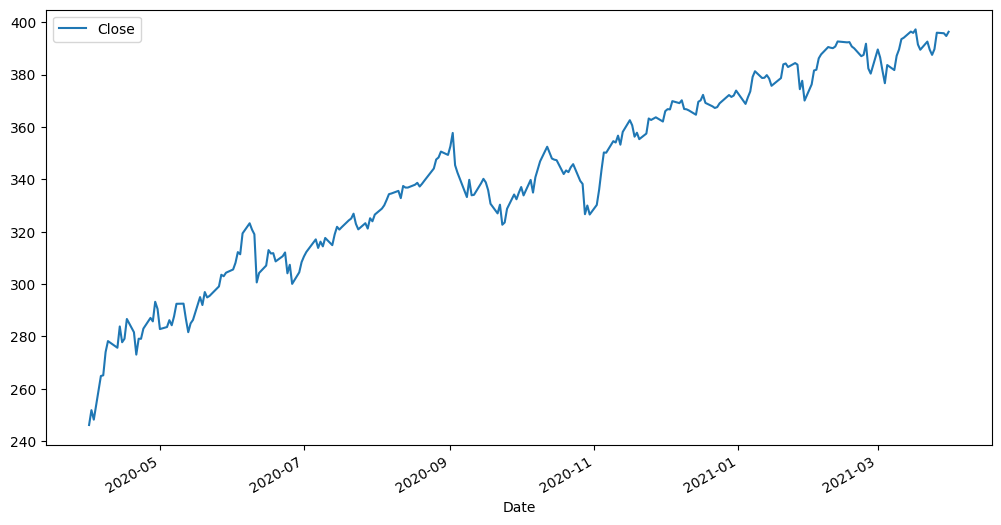

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

#spy
spy = yf.download('spy', start='2020-04-01', end='2021-04-01')
spy

#테슬라 주식 종가
df_spy = pd.DataFrame(spy['Close'])

#시각화
df_spy.plot(figsize=(12.2, 6.4))

In [3]:
from statsmodels.tsa.stattools import adfuller

print('ADF test with spy time-series')
ADF_result = adfuller(df_spy.values)
#ADF 통계량
print('ADF Stats: %f' % ADF_result[0])
#p-값
print('p-value: %f' % ADF_result[1])
#임계값
print('Critical values:' )
for key, value in ADF_result[4].items():
 print('\t%s: %.4f' % (key, value))


ADF test with spy time-series
ADF Stats: -1.385978
p-value: 0.588980
Critical values:
	1%: -3.4573
	5%: -2.8734
	10%: -2.5731


In [18]:
ar = spy[["Close"]].copy()
ar["lag_1"] = ar.shift(-1)

In [19]:
ar

,Close,lag_1
Date,,
2020-04-01,246.149994,251.830002
2020-04-02,251.830002,248.190002
2020-04-03,248.190002,264.859985
2020-04-06,264.859985,265.130005
2020-04-07,265.130005,274.029999
...,...,...
2021-03-25,389.700012,395.980011
2021-03-26,395.980011,395.779999
2021-03-29,395.779999,394.730011
